In [7]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [8]:
data = pd.read_csv("ipl_2022.csv")
data.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

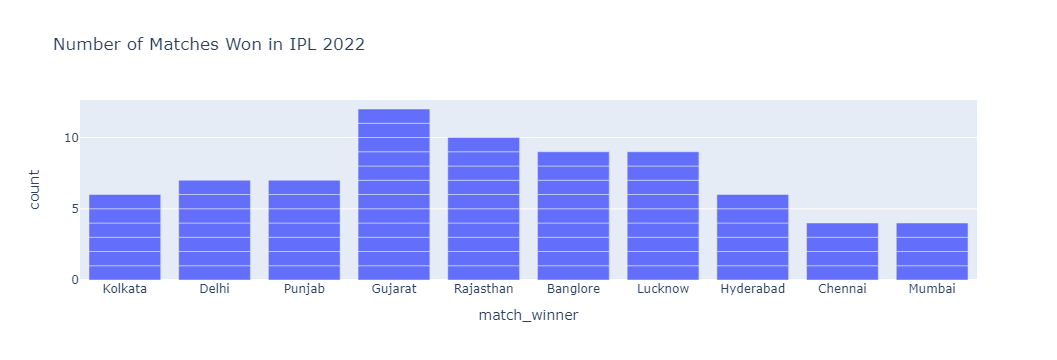

In [10]:
figure  = px.bar(data , x =data["match_winner"],
                title = "Number of Matches Won in IPL 2022")
figure.show()

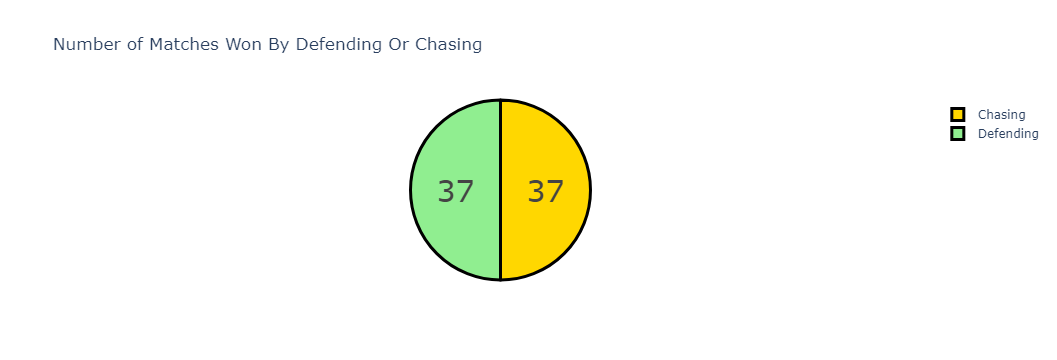

In [11]:
data["won_by"] = data["won_by"].map({"Wickets":"Chasing",
                                    "Runs":"Defending"})
won_by = data["won_by"].value_counts()
label = won_by.index
counts = won_by.values
colors = ['gold','lightgreen']

fig = go.Figure(data = [go.Pie(labels = label , values = counts)])
fig.update_layout(title_text = 'Number of Matches Won By Defending Or Chasing')
fig.update_traces(hoverinfo = 'label+percent',textinfo = 'value',
                 textfont_size = 30,
                 marker = dict(colors = colors,
                              line = dict(color='black',width=3)))
fig.show()

In [12]:
toss = data["toss_decision"].value_counts()
label = toss.index
counts = toss.values
print(toss)
print(label)
print(counts)

toss_decision
Field    59
Bat      15
Name: count, dtype: int64
Index(['Field', 'Bat'], dtype='object', name='toss_decision')
[59 15]


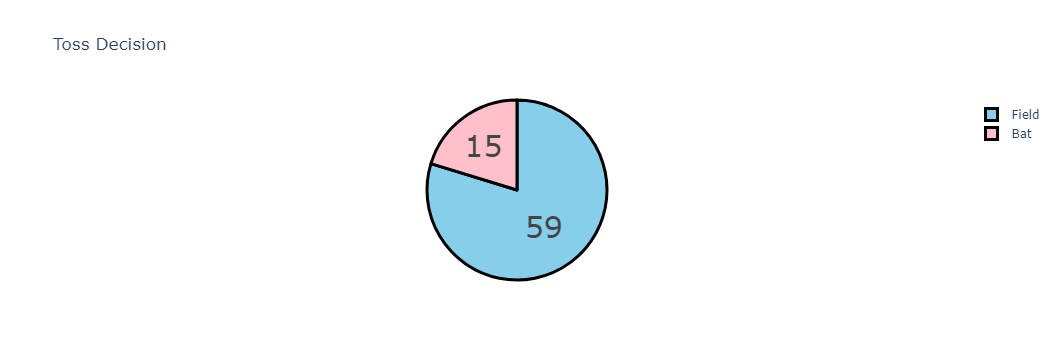

In [13]:
toss = data["toss_decision"].value_counts()
label = toss.index
counts = toss.values
colors = ['skyblue','pink']

fig = go.Figure(data = [go.Pie(labels = label , values = counts)])
fig.update_layout(title_text = 'Toss Decision')
fig.update_traces(hoverinfo = 'label+percent',textinfo = 'value',
                 textfont_size = 30,
                 marker = dict(colors = colors,
                              line = dict(color='black',width=3)))
fig.show()

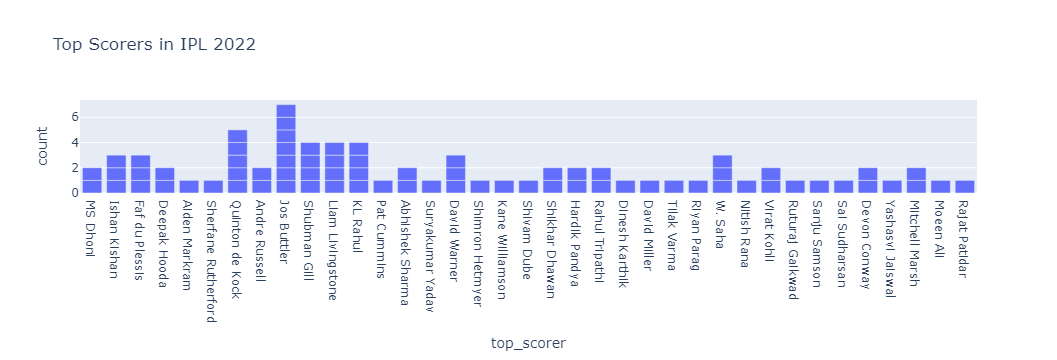

In [14]:
figure = px.bar(data , x=data["top_scorer"],
               title = "Top Scorers in IPL 2022")
figure.show()

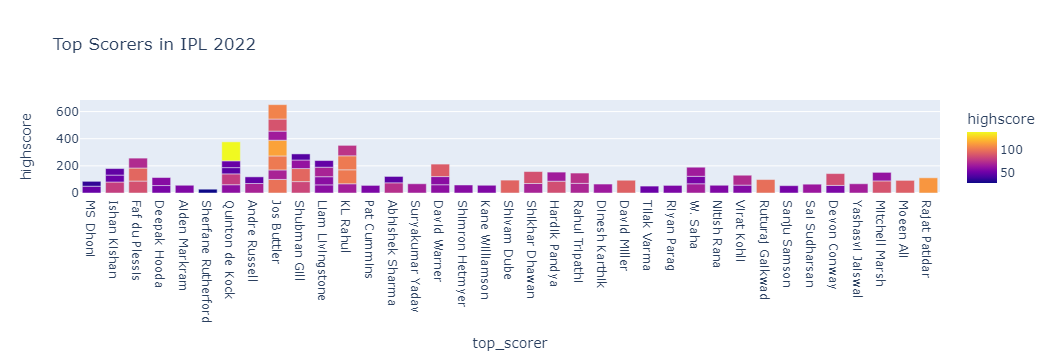

In [15]:
figure = px.bar(data,x=data["top_scorer"],
               y=data["highscore"],
               color= data["highscore"],
               title = "Top Scorers in IPL 2022")
figure.show()

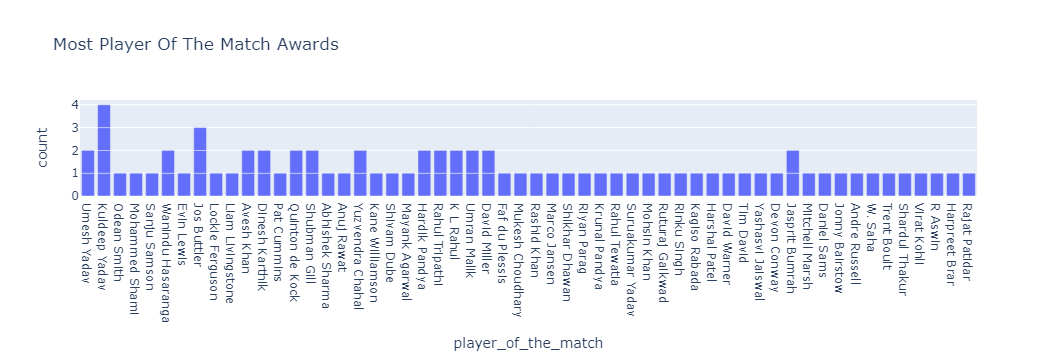

In [16]:
figure = px.bar(data , x=data["player_of_the_match"],
               title = "Most Player Of The Match Awards")
figure.show()

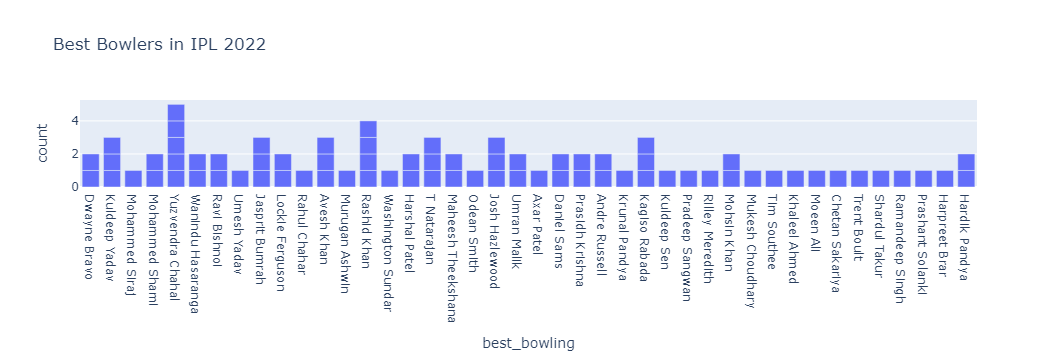

In [18]:
figure = px.bar(data , x=data["best_bowling"],
               title = "Best Bowlers in IPL 2022")
figure.show()

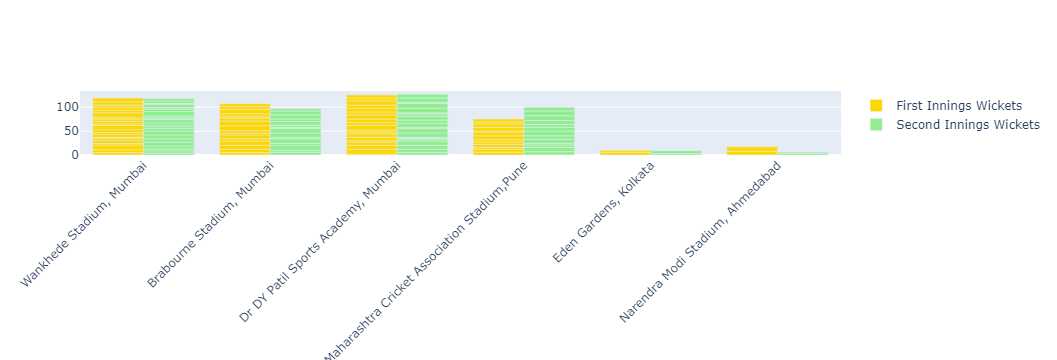

In [21]:
figure = go.Figure()
figure.add_trace(go.Bar(
    x =data["venue"],
    y=data["first_ings_wkts"],
    name = 'First Innings Wickets',
    marker_color = 'gold'  
))
figure.add_trace(go.Bar(
    x =data["venue"],
    y=data["second_ings_wkts"],
    name = 'Second Innings Wickets',
    marker_color = 'lightgreen'  
))
figure.update_layout(barmode = 'group',xaxis_tickangle = -45)
figure.show()